In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web

In [38]:
ForexList = ["GBPUSD","GBPEUR","GBPJPY","GBPAUD","GBPCHF","GBPCAD","GBPNZD","GBPNOK","GBPSEK"]

In [67]:
#Function call for getting data from .csv files
def GetDataPrices(ForexList):
    
    CloseDF = []
    OpenDF = []
    
    for Forex in ForexList:
        Table = pd.read_csv("./Data_Price/" + Forex + "=X.csv", index_col='Date')
        CloseDF.append(Table.Close)
        OpenDF.append(Table.Open)
    
    CloseDF = pd.concat(CloseDF, axis = 1)
    OpenDF = pd.concat(OpenDF, axis = 1)
    
    CloseDF.index = pd.to_datetime(CloseDF.index)
    OpenDF.index = pd.to_datetime(OpenDF.index)
    
    CloseDF.columns = ForexList
    OpenDF.columns = ForexList
    
    CloseDF.dropna(inplace=True)
    OpenDF.dropna(inplace=True)
    
    return [CloseDF, OpenDF]

In [77]:
#Function call for downloading data from Yahoo
def GetDataPrices2(ForexList):
    
    CloseDF = []
    OpenDF = []
    
    for Forex in ForexList:
        name = Forex + "=X"
        Table = web.DataReader(name = name, data_source = 'yahoo', start='2015-01-01') 
        CloseDF.append(Table.Close)
        OpenDF.append(Table.Open)
        
    CloseDF = pd.concat(CloseDF, axis = 1)
    OpenDF = pd.concat(OpenDF, axis = 1)
    
    CloseDF.columns = ForexList
    OpenDF.columns = ForexList
    
    CloseDF.fillna(method='ffill', inplace=True)
    OpenDF.fillna(method='ffill', inplace=True)

    return [CloseDF, OpenDF]

In [78]:
#By using Yahoo, all of the price info saved into CloseDF and OpenDF
ResultsData = GetDataPrices2(ForexList)
CloseDF = ResultsData[0]
OpenDF = ResultsData[1]

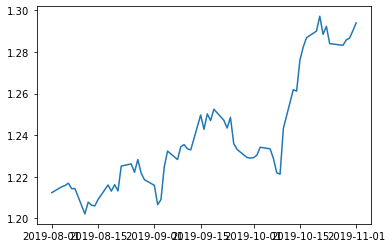

In [90]:
plt.plot(CloseDF.GBPUSD["2019-08-01":"2019-11-01"])
plt.show()

In [91]:
def CreateIndex(Prices):
    
    Returns = (np.log(Prices) - np.log(Prices.shift(1))).dropna()
    IndexRet = (Returns * (1 / Prices.shape[1])).sum(axis=1)
    
    Index = np.exp(IndexRet.cumsum()) * 100
    
    IndexRet.name = "IndexRet"
    Index.name = "Index"
    
    return [Index, IndexRet]

In [92]:
ResultsIndex = CreateIndex(CloseDF)
GBPIndex = ResultsIndex[0]
GBPReturns = ResultsIndex[1]

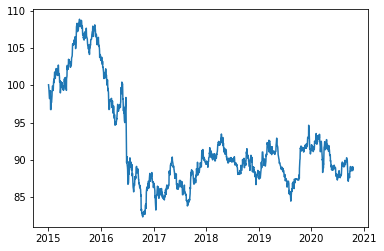

In [93]:
plt.plot(GBPIndex)
plt.show()

#### Create Volatility index

In [94]:
Window = 21
VolIndex = GBPReturns.rolling(Window).std().dropna()
VolIndex.name = "VolIndex"

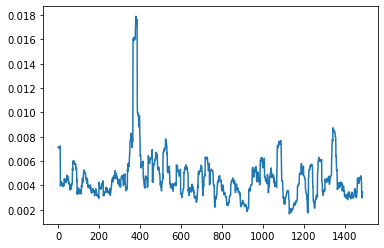

In [95]:
plt.plot((VolIndex).values)
plt.show()

In [27]:
#VolIndex.to_csv("Vol_Index.csv")
#GBPIndex.to_csv("Price_Index.csv")
#GBPReturns.to_csv("Returns_Index.csv")

In [28]:
#VolIndex = pd.read_csv("Vol_Index.csv")
#GBPIndex = pd.read_csv("Price_Index.csv")
#GBPReturns = pd.read_csv("Returns_Index.csv")

In [96]:
VolIndex= VolIndex.to_frame(name="Vol_Index")
GBPIndex=GBPIndex.to_frame(name="Price_Index")
GBPReturns= GBPReturns.to_frame(name='Returns_Index')

In [97]:
#Create dataframe for holding price info.
df_price= VolIndex.merge(GBPIndex,on='Date').merge(GBPReturns,on='Date')

In [98]:
df_price.head()

,Vol_Index,Price_Index,Returns_Index
Date,,,
2015-01-30,0.007165,99.898087,0.000013
2015-02-02,0.007164,99.830014,-0.000682
2015-02-03,0.007109,99.307926,-0.005243
2015-02-04,0.007065,99.534349,0.002277
2015-02-05,0.007072,100.198768,0.006653


In [100]:
#df_price.to_csv('daily_price.csv')